### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Setup : Import the Dataset

Dataset on Telco Churn : Attached file `TelcoChurn.csv`

In [2]:
telco = pd.read_csv('TelcoChurn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


At a first glance, we have some categorical variables and numerical ones.

* There are `20` variables/features/columns and `7043` observations/samples/rows in the dataset.  
* The response variable seems to be `Churn`, while the remaining 19 are most likely predictors. 
* There are `2` variables identified as `int64` by default, and it seems they are indeed Numeric.     
* There are `18` variables identified as `object` by default, and they are most likely Categorical.      
* CustomerID is a unique identifier which means it will be not be a useful feature to predict the response variable.

# Data preparation and cleaning

In [4]:
#Numeric Predictors
telco[['SeniorCitizen','tenure','MonthlyCharges']].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Categorical Predictors
telco[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


In [6]:
telco['SeniorCitizen'] = telco.SeniorCitizen.astype(object)

As, we did an initial inspection of the features, we realised SeniorCitizen Dtype of `int64` was wrongly classified. SeniorCitizen should be categorical predictors and needs to be classify as `object`

In [7]:
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors = 'coerce')
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
telco["TotalCharges"].fillna(telco["TotalCharges"].mean(), inplace=True)

In [9]:
# missing values check
print(telco.isnull().any())
print("\n Null values in 'TotalCharges`: ",telco["TotalCharges"].isnull().sum())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

 Null values in 'TotalCharges`:  0


In [10]:
telco = telco.drop('customerID', axis=1)

Since CustomerID is a unique identifier, we decided to drop the column as it will be not be a useful feature to predict the response variable.

# Exploratory Data Analysis

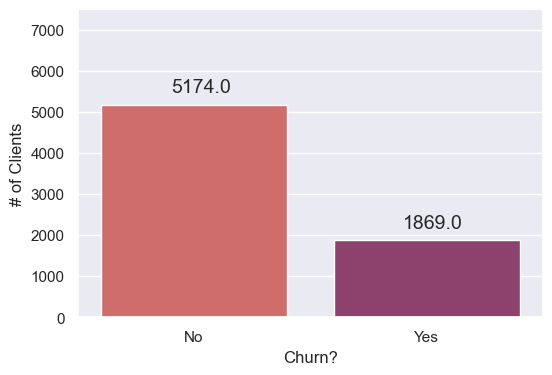

In [11]:
plt.figure(figsize=(6,4))

ax = sb.countplot(x="Churn", data=telco, palette="flare")

plt.xlabel("Churn?", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,7500)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.show()

In [12]:
countN, countY = telco['Churn'].value_counts()
print("Ratio of classes is No : Yes = ", countN, ":", countY)

Ratio of classes is No : Yes =  5174 : 1869


### Demographic Predictor

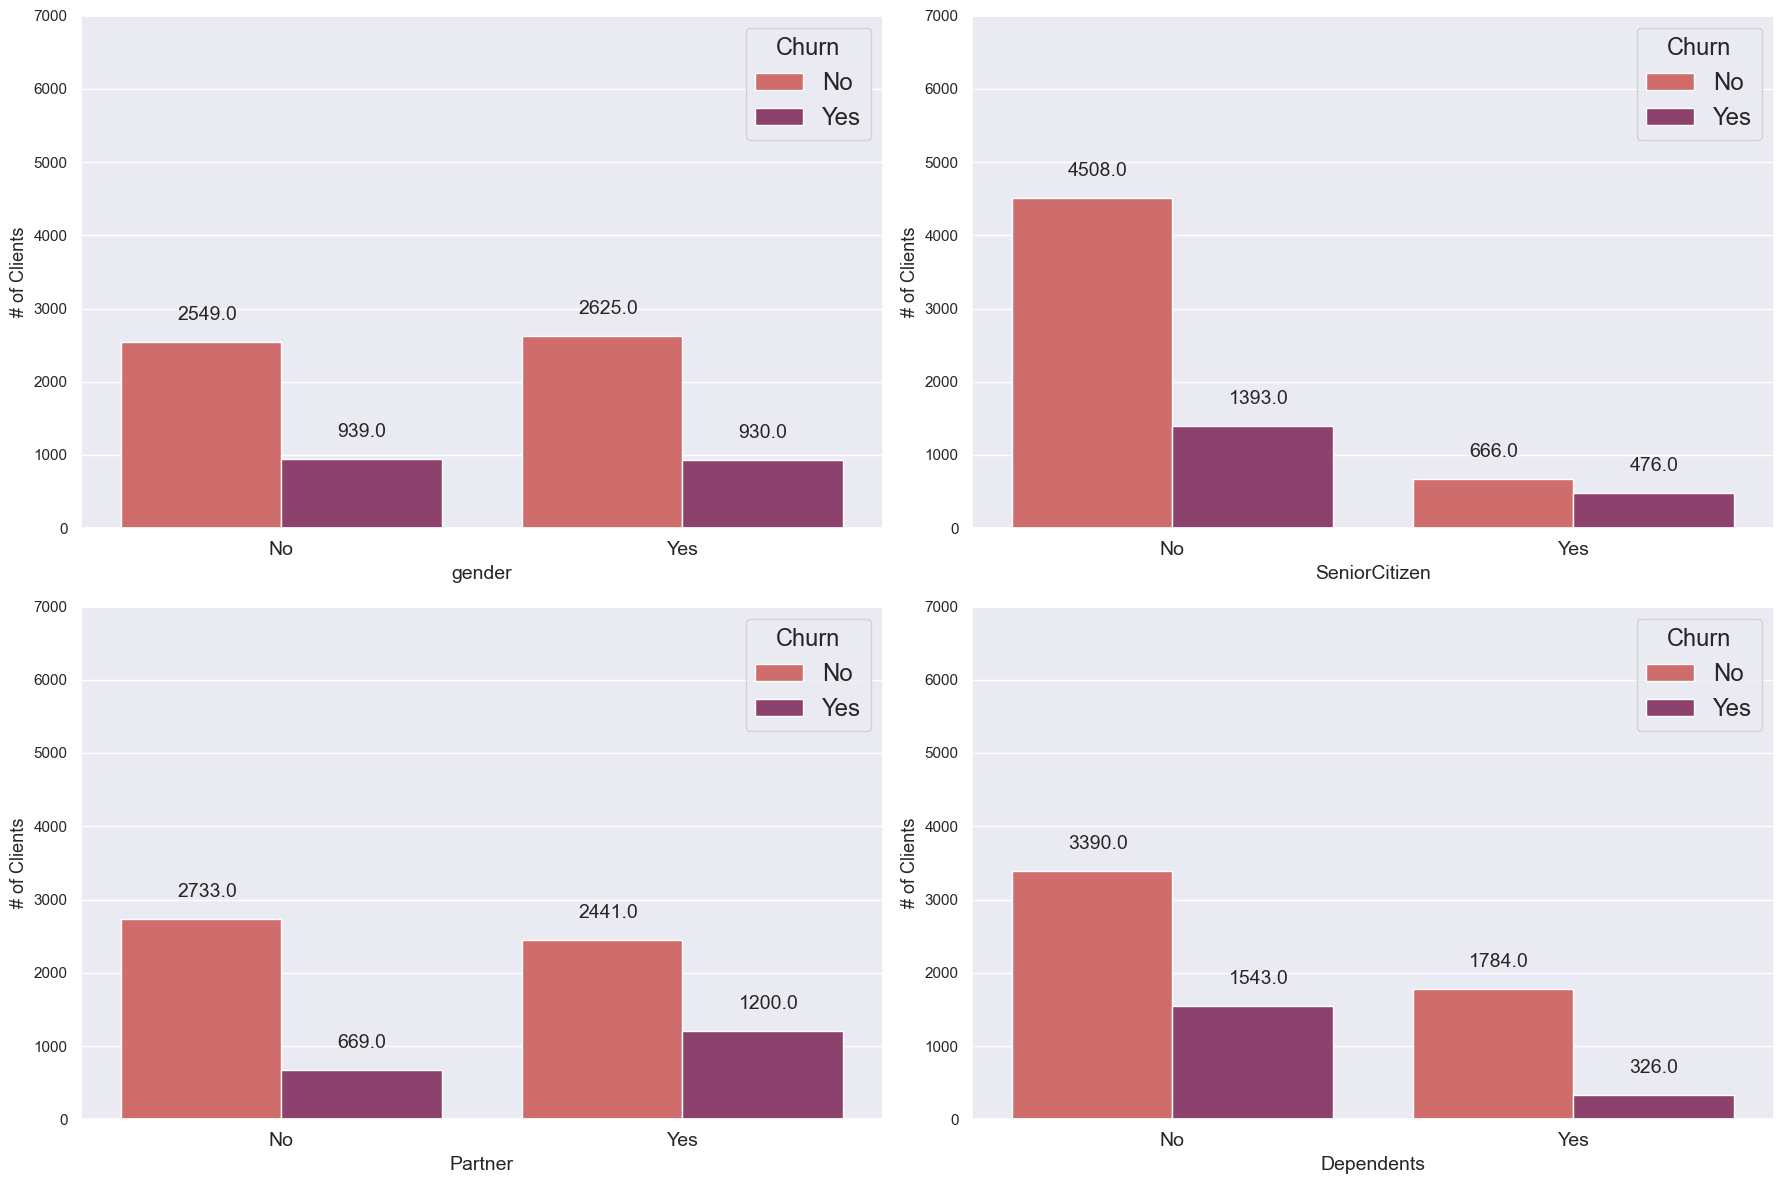

In [13]:
demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(18,12))

for i,col in enumerate(demographic):    
    plt.subplot(2,2,i + 1)
    
    ax = sb.countplot(data = telco, x = col, hue="Churn", palette = 'flare')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks([0,1], ['No', 'Yes'], fontsize = 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

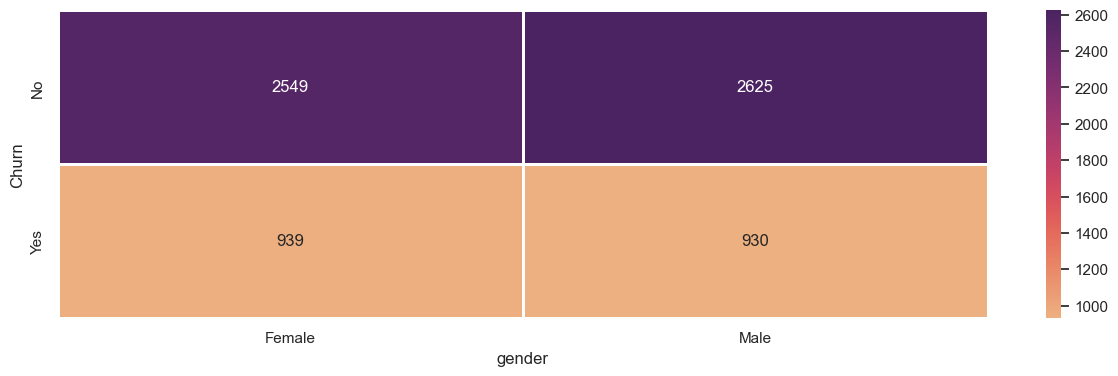

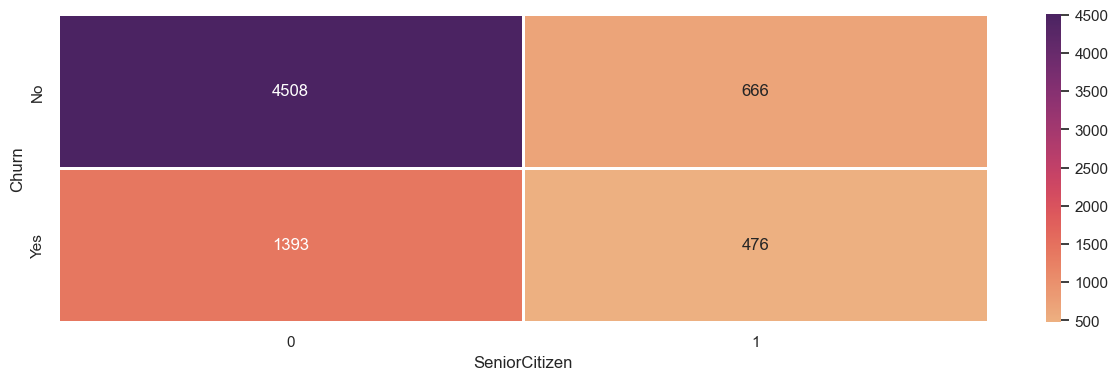

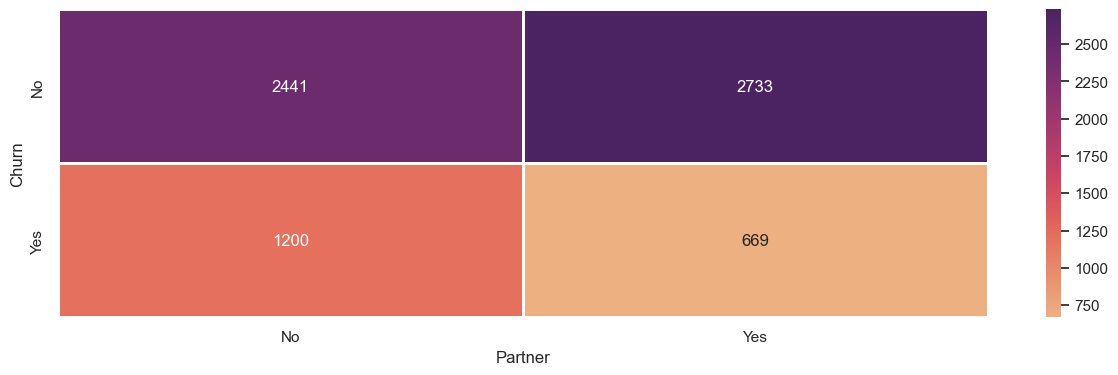

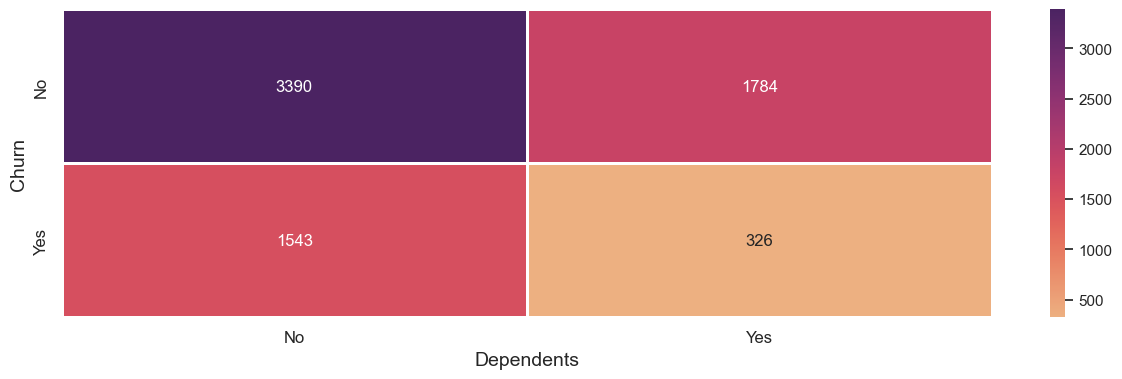

In [14]:
for var in demographic:
    f = plt.figure(figsize=(15, 4))
    sb.heatmap(telco.groupby(['Churn', var]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "flare")
plt.xlabel(var, fontsize=14)
plt.ylabel('Churn', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the observation of Demographic Predictor from the plot and distribution
* Genders, both are male and female distribution are about the same, both also show equal amount of churned customers.  

* Senior Citizen, there are more younger customers, and they are more likely to churn (leave the telco company)

* Partner, Customer with or without partners are about the same. Those with partner more likely to churn. 

* Dependent, Customer with dependent are more than thoss without. Those without dependant are also more likely to churn  

### Add-On Services

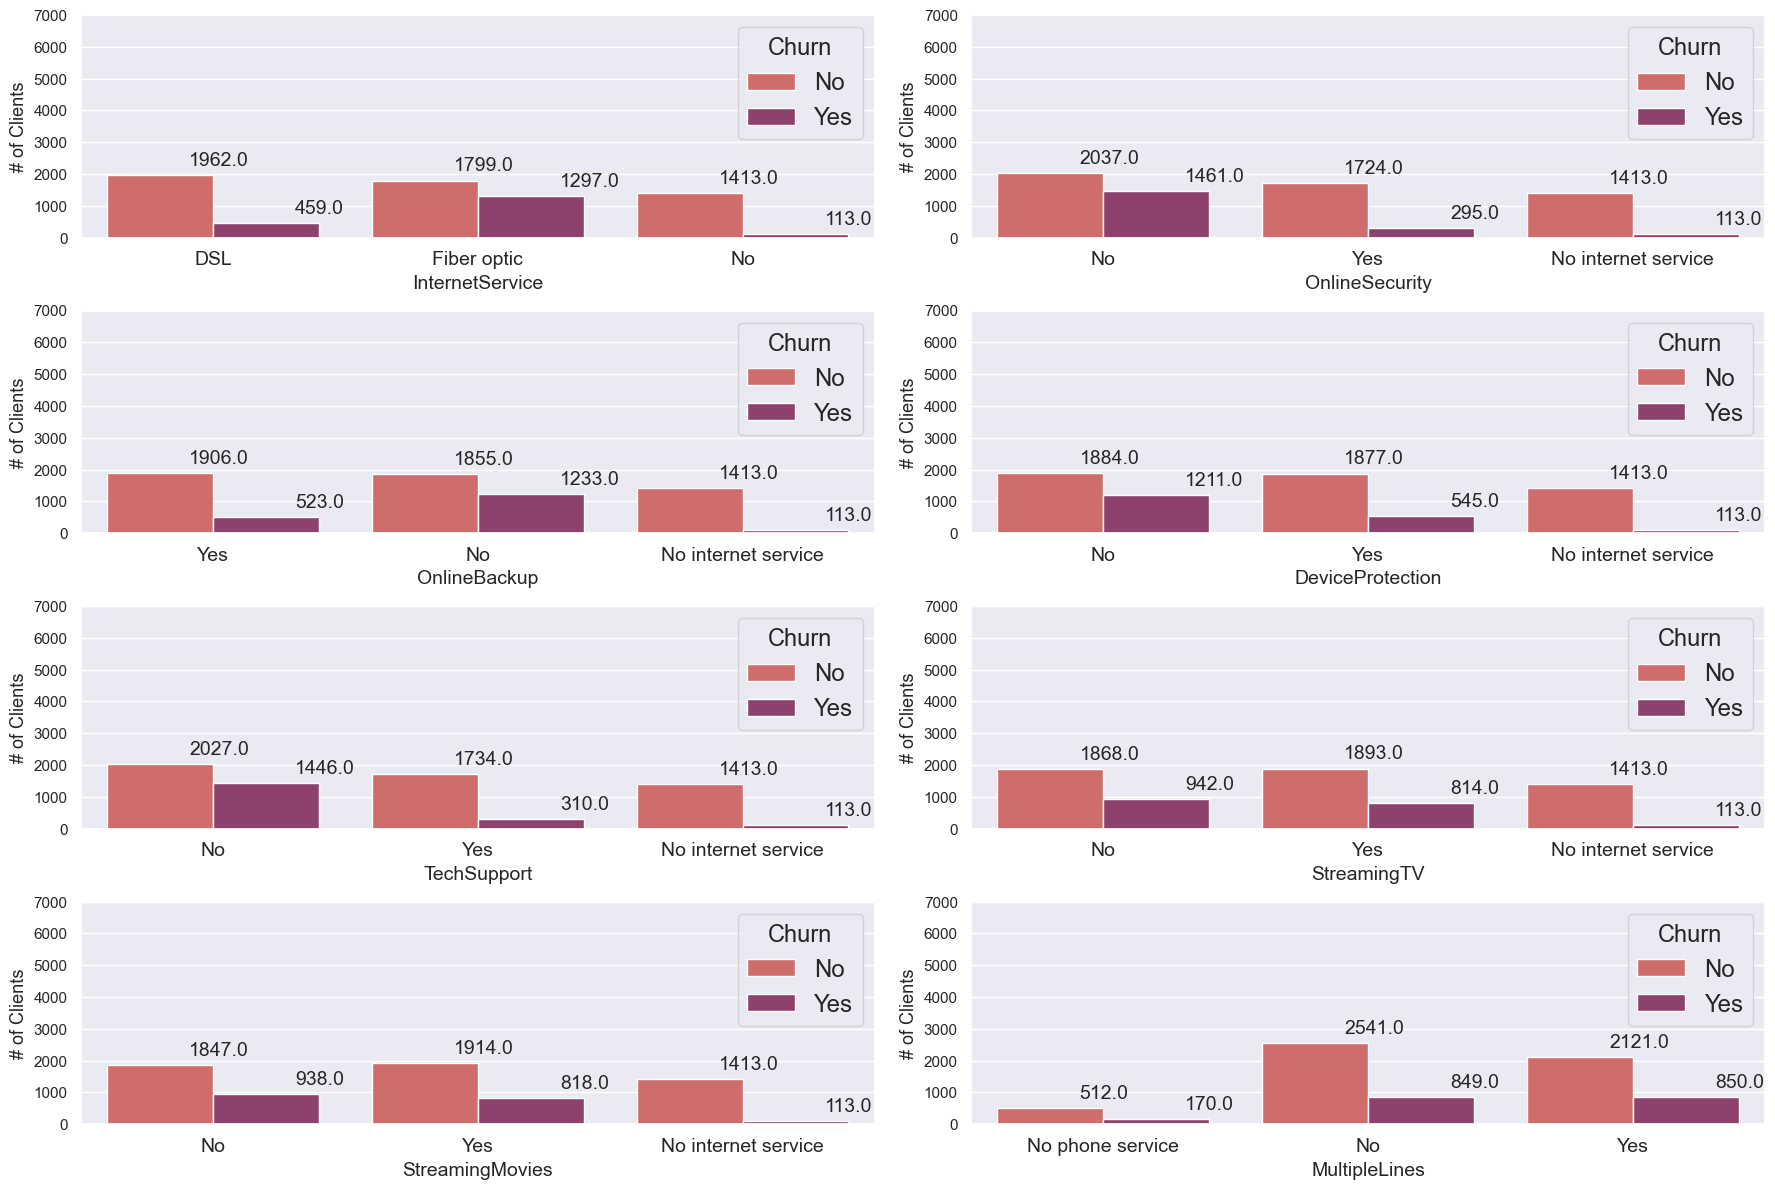

In [15]:
addonservices = ['InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines']

plt.figure(figsize=(18,12))

for i,col in enumerate(addonservices):    
    plt.subplot(4,2,i + 1)
    
    ax = sb.countplot(data = telco, x = col, hue="Churn", palette = 'flare')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

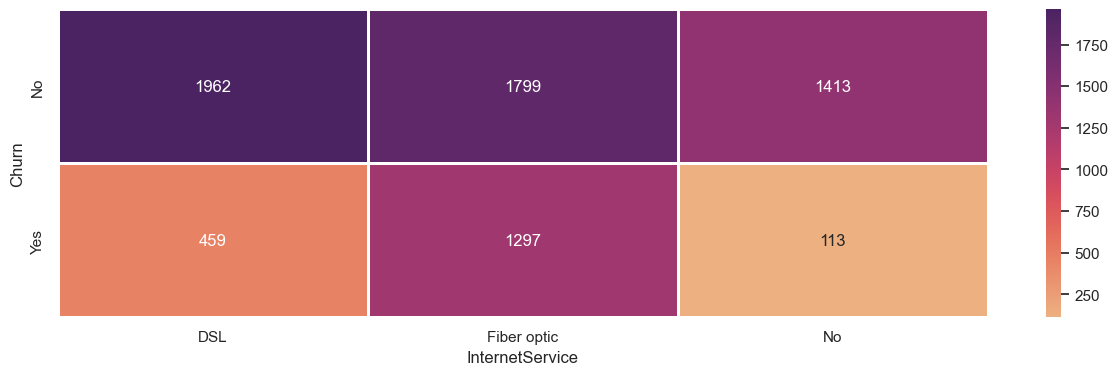

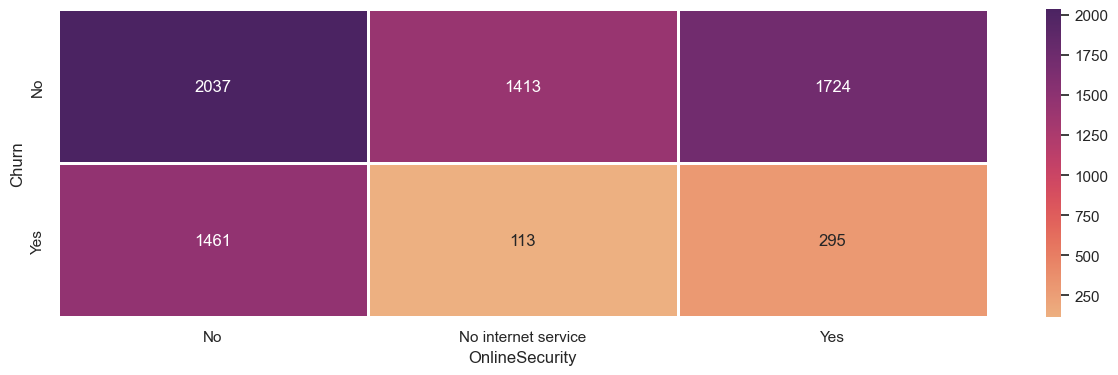

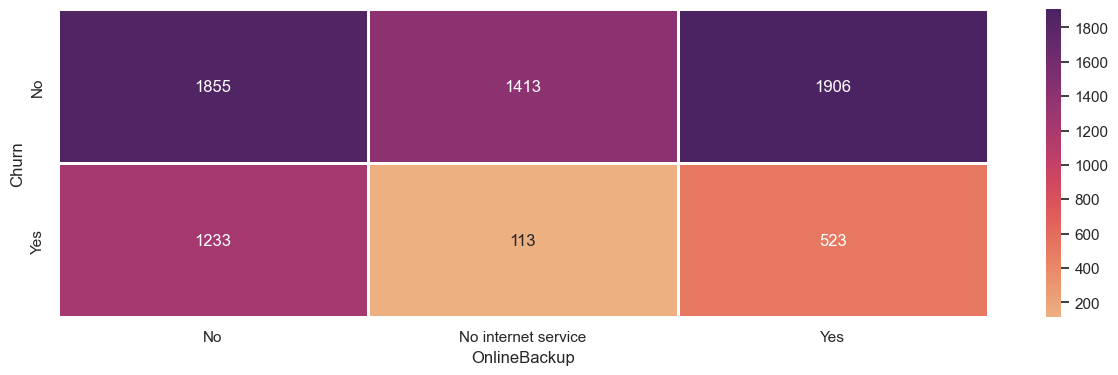

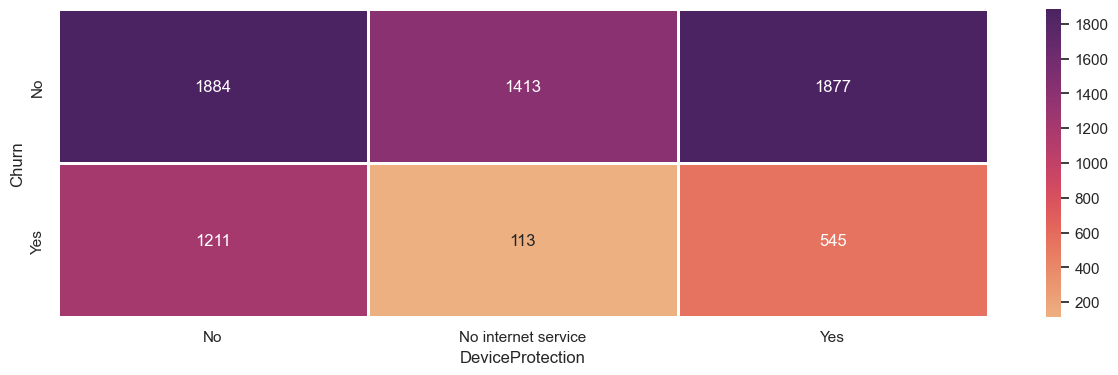

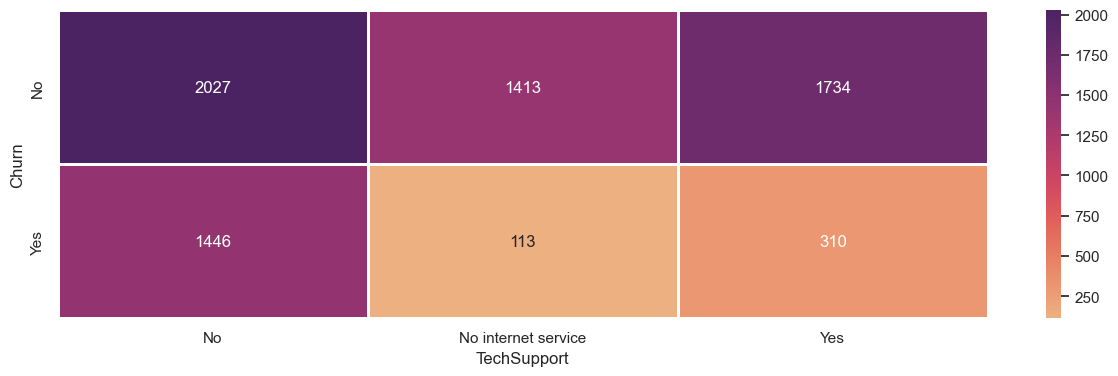

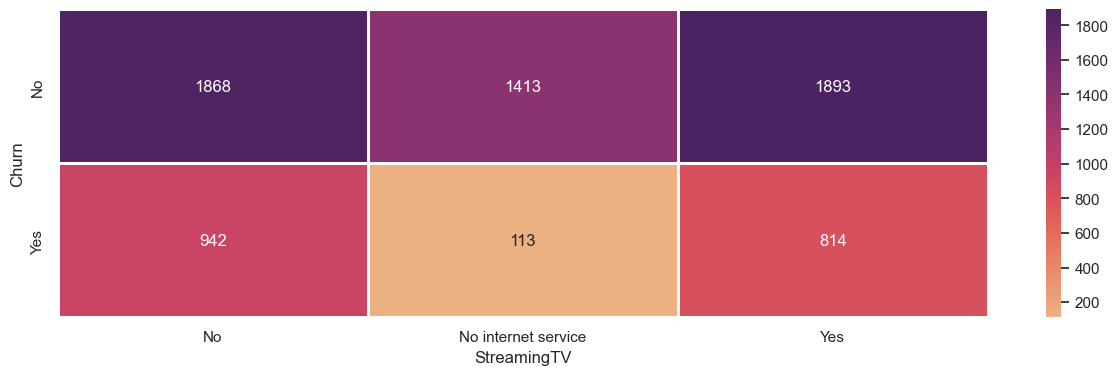

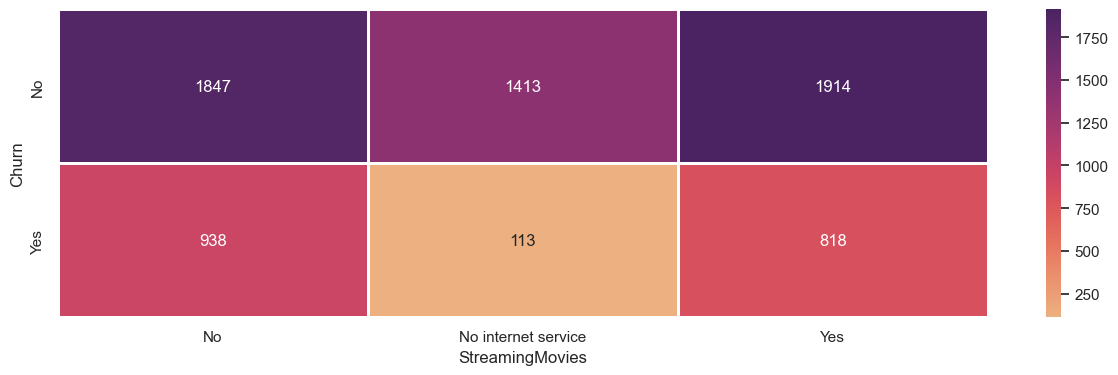

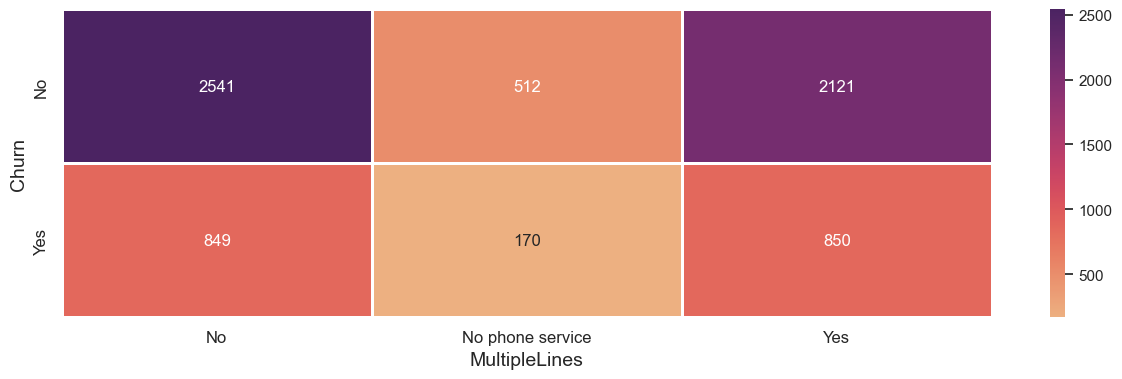

In [16]:
for var in addonservices:
    f = plt.figure(figsize=(15, 4))
    sb.heatmap(telco.groupby(['Churn', var]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "flare")
plt.xlabel(var, fontsize=14)
plt.ylabel('Churn', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the observation of Add-On Predictor from the plot and distribution
* InternetService, those customer who have internet service opt for either DSL or Fiber optic. Customer uses Fiber optic are more likely to churn 

* There are common trend features such as 

### Account Information

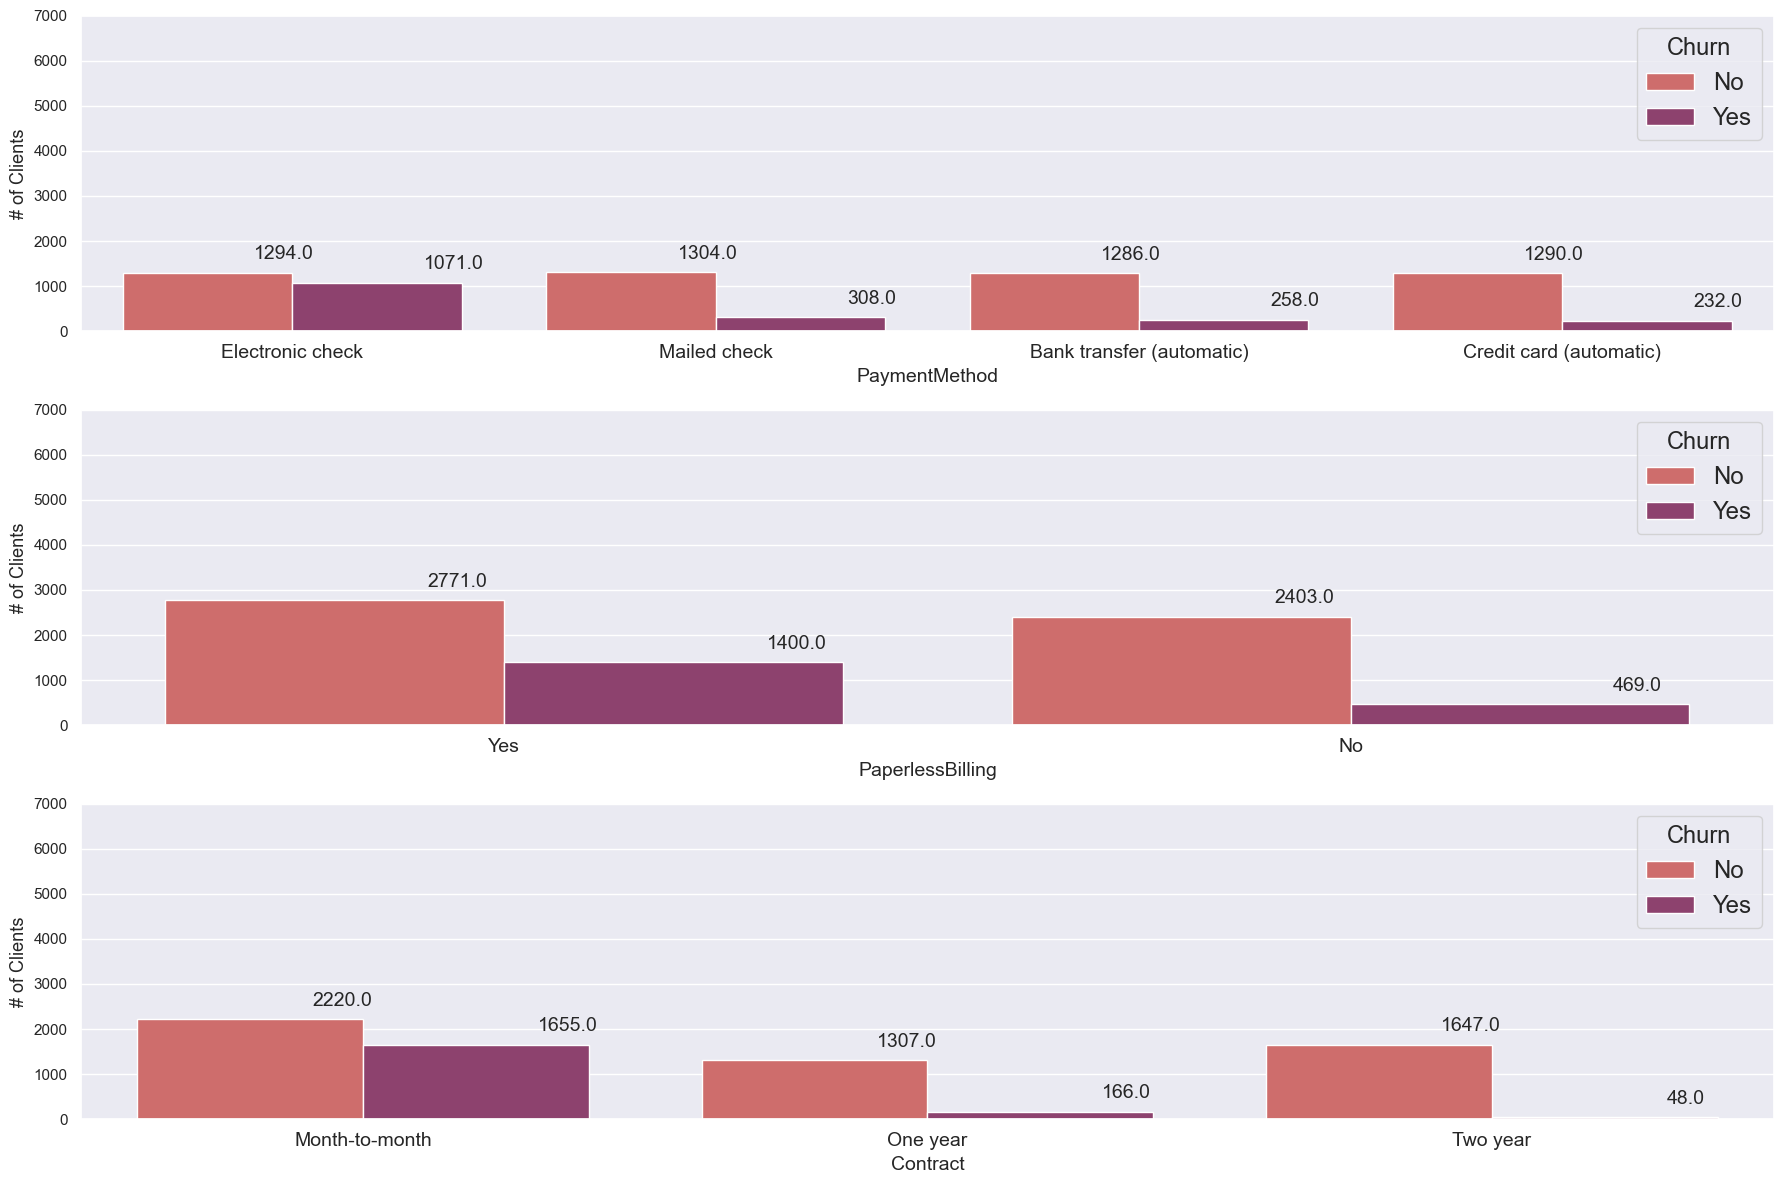

In [17]:
accountinfo = ['PaymentMethod', 'PaperlessBilling', 'Contract']

plt.figure(figsize=(18,12))

for i,col in enumerate(accountinfo):    
    plt.subplot(3,1,i + 1)
    
    ax = sb.countplot(data = telco, x = col, hue="Churn", palette = 'flare')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

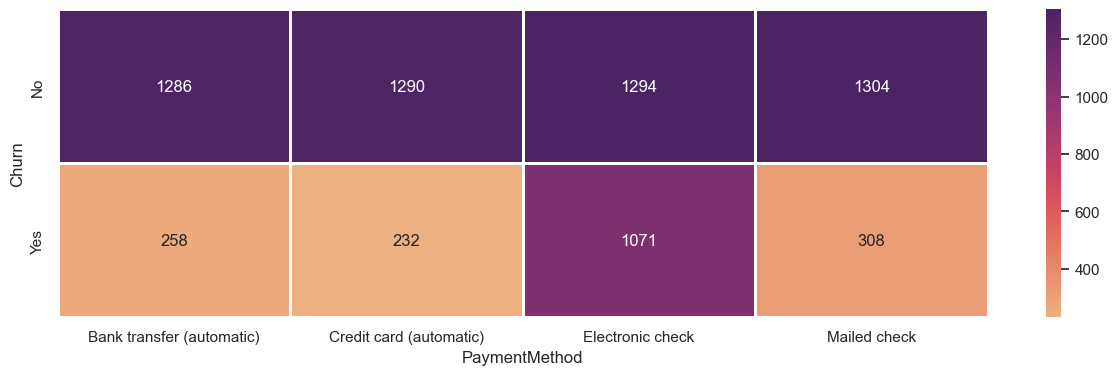

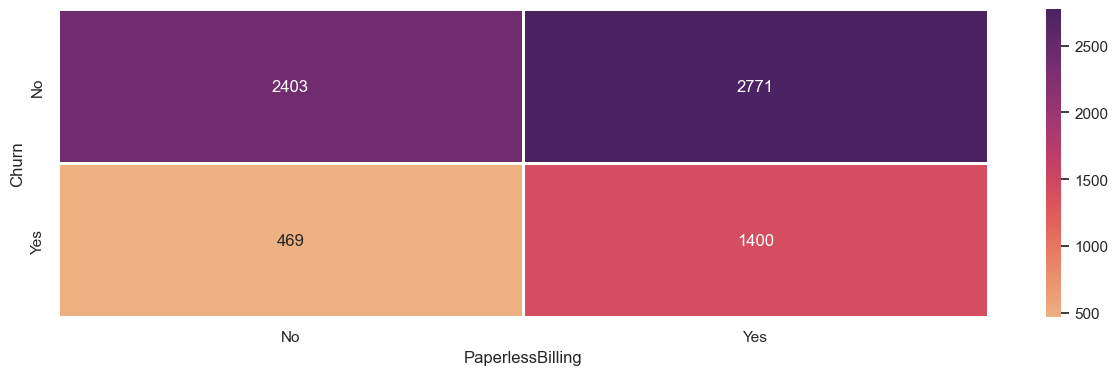

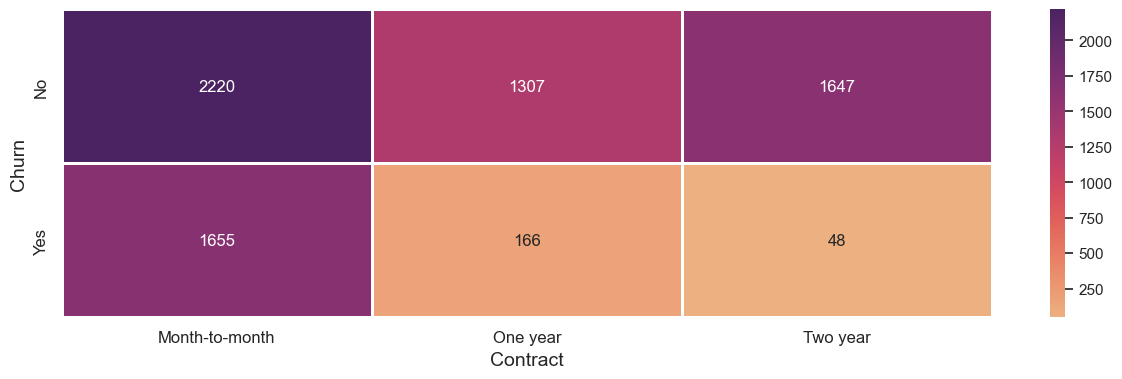

In [18]:
for var in accountinfo:
    f = plt.figure(figsize=(15, 4))
    sb.heatmap(telco.groupby(['Churn', var]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "flare")
plt.xlabel(var, fontsize=14)
plt.ylabel('Churn', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

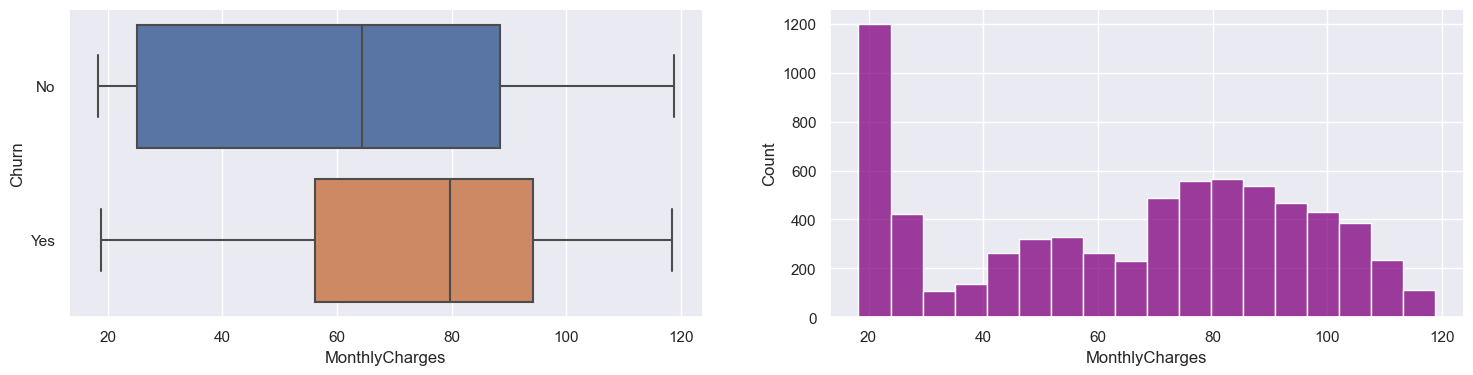

In [19]:
# Monthly Charges
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telco, orient = "h", ax = axes[0])
sb.histplot(data = telco['MonthlyCharges'], ax = axes[1],color = 'purple')

<Axes: xlabel='TotalCharges', ylabel='Count'>

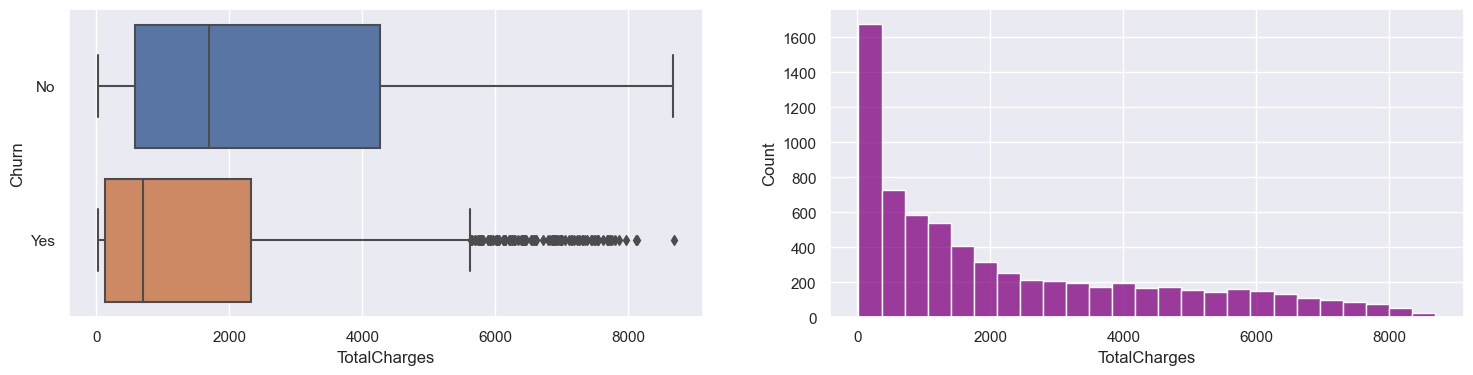

In [20]:
# Monthly Charges
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = 'TotalCharges', y = 'Churn', data = telco, orient = "h", ax = axes[0])
sb.histplot(data = telco['TotalCharges'], ax = axes[1],color = 'purple')

<Axes: xlabel='tenure', ylabel='Count'>

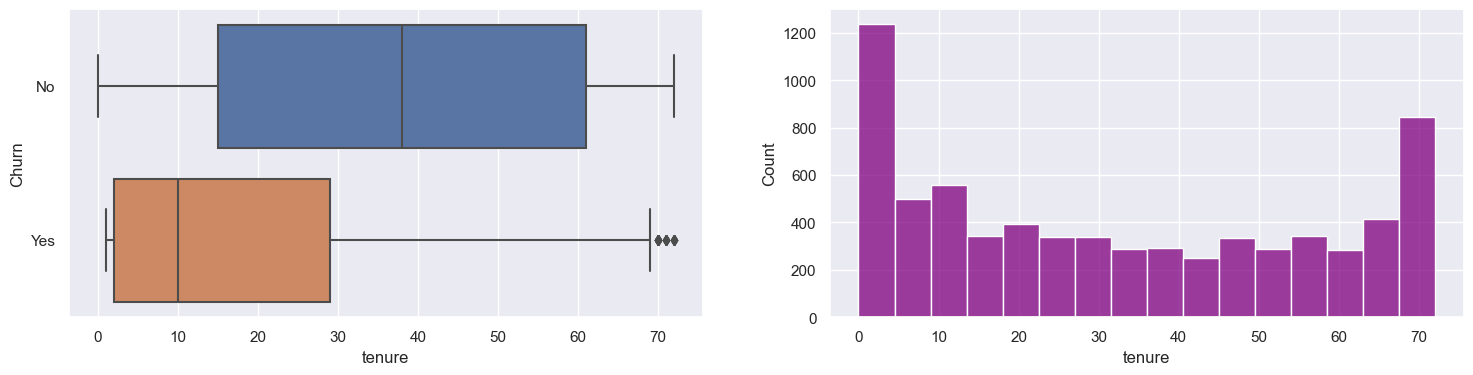

In [21]:
# Monthly Charges
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = 'tenure', y = 'Churn', data = telco, orient = "h", ax = axes[0])
sb.histplot(data = telco['tenure'], ax = axes[1],color = 'purple')

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
yes_no_map = {"Yes" : 1, "No" : 0}

def binary_encode(features):
    for feature in features:
        telco[feature] = telco[feature].map(yes_no_map)
        
binary_encode_candidate = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(binary_encode_candidate)

In [24]:
telco_ohe_data = pd.get_dummies(telco, columns = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Dependents','Partner'], dtype=int)
##telco_ohe = telco_ohe_data.drop(columns=['Partner','SeniorCitizen','Dependents','tenure','PhoneService', 'PaperlessBilling','MonthlyCharges','TotalCharges'])

In [25]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

telco_mms = pd.DataFrame(telco_ohe_data, columns=features_mms)
telco_remaining = telco_ohe_data.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(telco_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=telco_remaining.index)
telco_ohe_data = pd.concat([rescaled_feature_df,telco_remaining],axis=1)
telco_ohe_data.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,MultipleLines_No,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Dependents_0,Dependents_1,Partner_0,Partner_1
0,0.013889,0.115423,0.001275,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0.472222,0.385075,0.215867,0,1,0,0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
2,0.027778,0.354229,0.010310,0,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,1,0
3,0.625000,0.239303,0.210241,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
4,0.027778,0.521891,0.015330,0,1,1,1,1,0,1,...,0,0,0,0,1,0,1,0,1,0


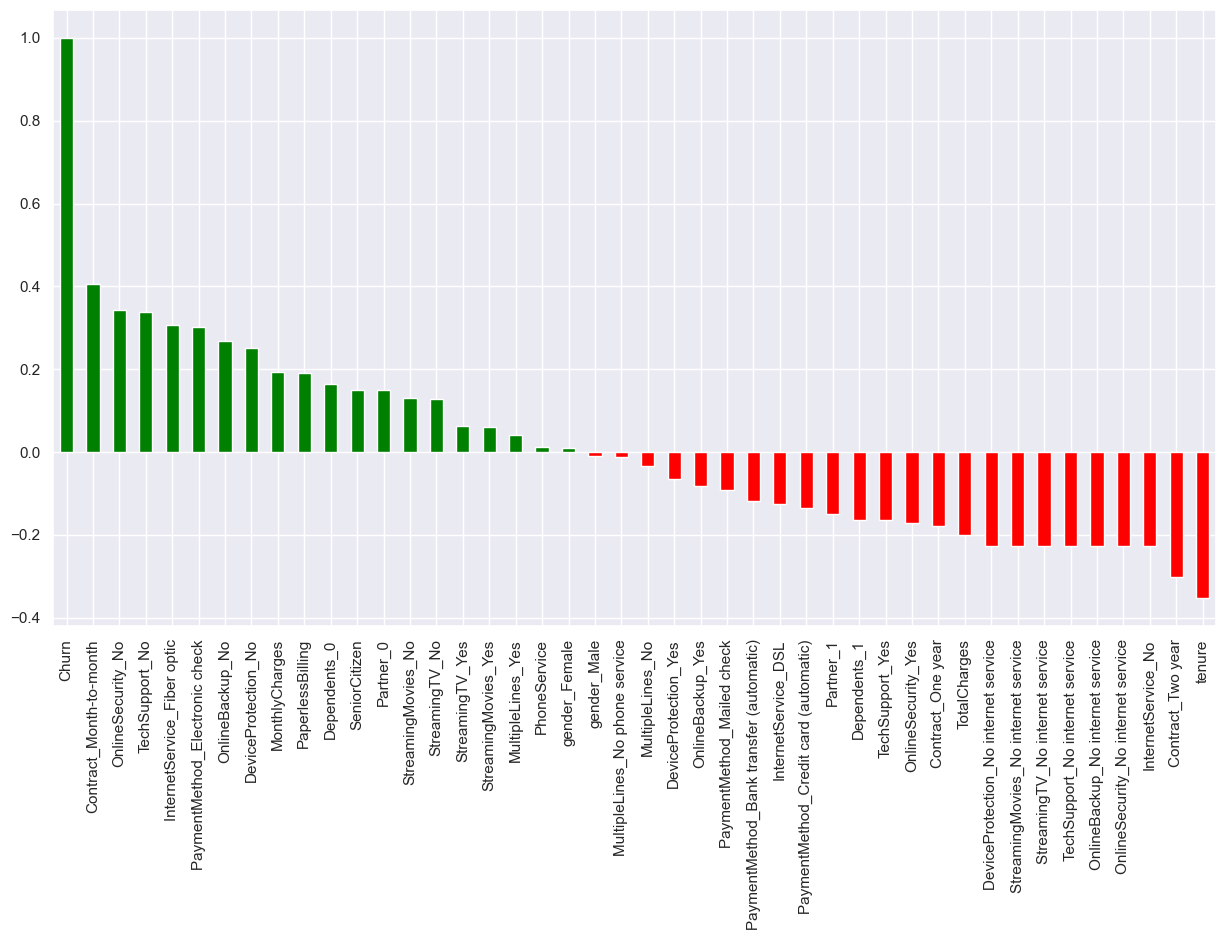

In [26]:
sb.set(font_scale=1)

# Plot the correlation
plt.figure(figsize=(15, 8))
correlation = telco_ohe_data.corr()['Churn'].sort_values(ascending=False)
colors = ['green' if corr > 0 else 'red' for corr in correlation]
correlation.plot(kind='bar', color=colors)

# Show plot
plt.show()

# Machine Learning Model 1: Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [28]:
telco_ohe_binary = telco_ohe_data.drop (columns = "Churn")
churn  = telco_ohe_data['Churn']

telco_ohe_binary_train, telco_ohe_binary_test, churn_train, churn_test = train_test_split(telco_ohe_binary, churn,test_size=0.3, random_state = 0)

# Check the sample sizes
print("Train Set :", telco_ohe_binary_train.shape, churn_train.shape)
print("Test Set  :", telco_ohe_binary_test.shape, churn_test.shape)


drop = ["MultipleLines_No phone service",
        "OnlineSecurity_No internet service",
        "OnlineBackup_No internet service",
        "DeviceProtection_No internet service",
        "TechSupport_No internet service",
        "StreamingTV_No internet service",
        "StreamingMovies_No internet service"]

for d in drop:
    telco_ohe_binary_train.drop(d, axis=1, inplace=True)
    telco_ohe_binary_test.drop(d, axis=1, inplace=True)

Train Set : (4930, 43) (4930,)
Test Set  : (2113, 43) (2113,)


In [29]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
        
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    return print("\n")

In [30]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall,precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 Score : {f1_score_result} \n AUC Score (PR) : {auc_score}")

In [31]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

In [32]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(telco_ohe_binary_train,churn_train)
selected_features_rfe = list(fit.support_)

final_features_rfe = []    
for status, var in zip(selected_features_rfe, telco_ohe_binary_train):
    if status == True:
        final_features_rfe.append(var)
        
final_features_rfe

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'SeniorCitizen',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'TechSupport_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'Dependents_1']

In [33]:
telco_ohe_binary_train_rfe = telco_ohe_binary_train[final_features_rfe]
telco_ohe_binary_test_rfe = telco_ohe_binary_test[final_features_rfe]

logreg = LogisticRegression(max_iter=1000)
logreg.fit(telco_ohe_binary_train_rfe,churn_train)
Churn_pred_logreg = logreg.predict(telco_ohe_binary_test_rfe)
Churn_pred_logreg_proba = logreg.predict_proba(telco_ohe_binary_test_rfe)

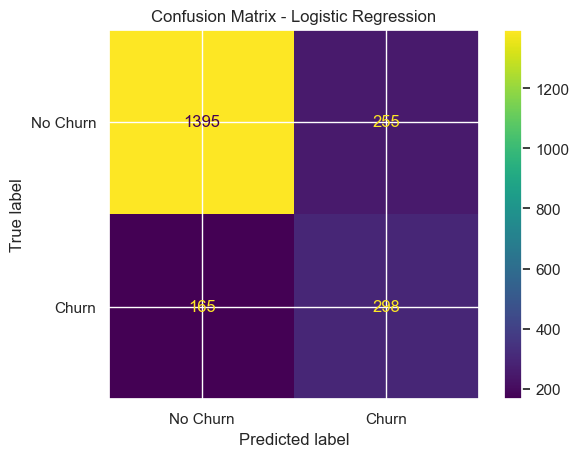

Accuracy Score Train = 0.8066937119675457
Accuracy Score Test = 0.8012304779933743




In [34]:
confusion_matrix_plot(telco_ohe_binary_train_rfe,churn_train,telco_ohe_binary_test_rfe,churn_test, Churn_pred_logreg,logreg,"Logistic Regression")

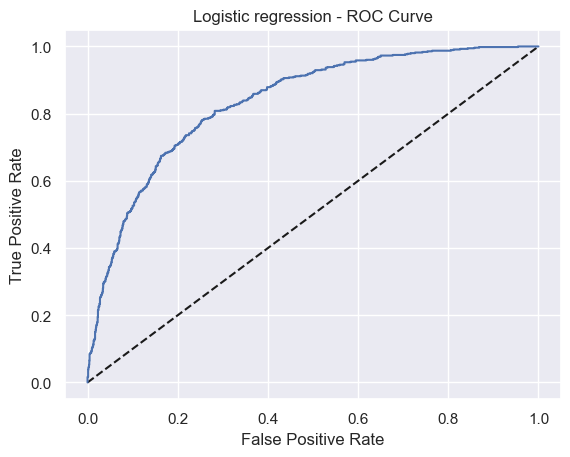

AUC Score (ROC):0.8352071451754994


In [35]:
roc_curve_auc_score(telco_ohe_binary_test_rfe,churn_test,Churn_pred_logreg_proba, "Logistic regression")

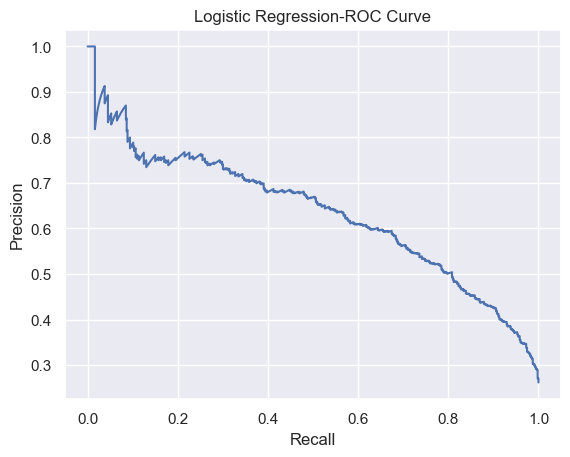

f1 Score : 0.5866141732283465 
 AUC Score (PR) : 0.6351968529035541


In [36]:
precision_recall_curve_and_scores(telco_ohe_binary_test_rfe,churn_test,Churn_pred_logreg,Churn_pred_logreg_proba,"Logistic Regression")

In [37]:
print(classification_report(churn_test, Churn_pred_logreg,
                            target_names=["Churn No", "Churn Yes"]))

              precision    recall  f1-score   support

    Churn No       0.85      0.89      0.87      1560
   Churn Yes       0.64      0.54      0.59       553

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



# Machine Learning Model 2: KNN Clustering

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.gridspec as gridspec

In [39]:
np_telco_ohe_binary_train = telco_ohe_binary_train_rfe.values
np_churn_train = churn_train.values.ravel()
np_telco_ohe_binary_test = telco_ohe_binary_test_rfe.values
np_churn_test = churn_test.values.ravel()

In [40]:
knn_cls = KNeighborsClassifier()
parameters = {
    "n_neighbors": range(30, 50, 2),
    "metric": ["minkowski"],
    "p": [1.0, 2.0],
    "algorithm": ["brute"]
}

skf_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
gscv = GridSearchCV(
    estimator=knn_cls,
    param_grid=parameters,
    scoring="f1",
    n_jobs=-1,
    cv=skf_cv,
    verbose=False
)

gscv.fit(np_telco_ohe_binary_train, np_churn_train)
churn_pred_knn = gscv.predict(np_telco_ohe_binary_test)
churn_pred_knn_proba =gscv.predict_proba(np_telco_ohe_binary_test)
print("Best parameters {}".format(gscv.best_params_))

Best parameters {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 48, 'p': 1.0}


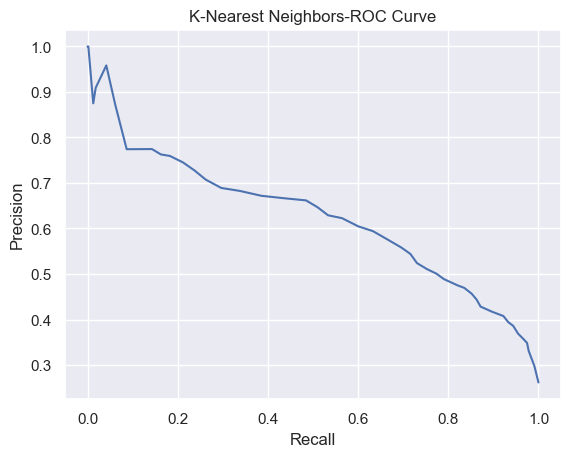

f1 Score : 0.5772994129158512 
 AUC Score (PR) : 0.6255146826118454


In [41]:
precision_recall_curve_and_scores(np_telco_ohe_binary_test,np_churn_test,churn_pred_knn,churn_pred_knn_proba,"K-Nearest Neighbors")

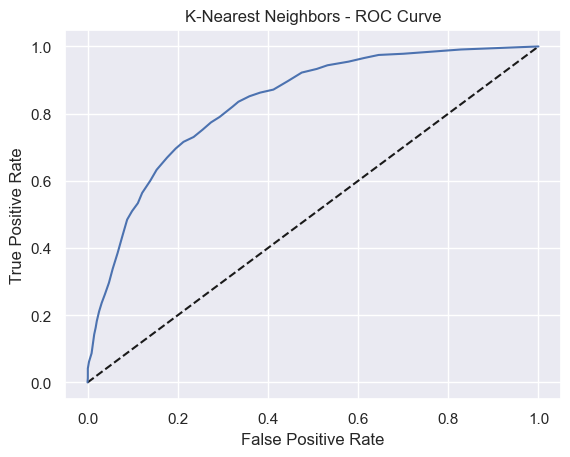

AUC Score (ROC):0.8306423007372374


In [42]:
roc_curve_auc_score(np_telco_ohe_binary_test,np_churn_test,churn_pred_knn_proba, "K-Nearest Neighbors")

In [43]:
knn_cls = KNeighborsClassifier(**gscv.best_params_)
knn_cls.fit(np_telco_ohe_binary_train, np_churn_train)
churn_pred = knn_cls.predict(np_telco_ohe_binary_test)
print(classification_report(np_churn_test, churn_pred,
                            target_names=["Churn No", "Churn Yes"]))

              precision    recall  f1-score   support

    Churn No       0.84      0.89      0.87      1560
   Churn Yes       0.63      0.53      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



# Attempt 2: Logistic Regression

In [44]:
from sklearn.utils import resample

telco_ohe_data_churn0 = telco_ohe_data[telco_ohe_data.Churn==0]
telco_ohe_data_churn1 = telco_ohe_data[telco_ohe_data.Churn==1]

telco_ohe_data_churn1_upsampled = resample(telco_ohe_data_churn1,
                                replace=True,
                                n_samples=5000,
                                random_state=123)

telco_ohe_data_upsampled = pd.concat([telco_ohe_data_churn0, telco_ohe_data_churn1_upsampled])

print('Churn Count in Original Data: \n', telco_ohe_data.Churn.value_counts(), '\n')
print('New Churn Count: \n', telco_ohe_data_upsampled.Churn.value_counts())

Churn Count in Original Data: 
 Churn
0    5174
1    1869
Name: count, dtype: int64 

New Churn Count: 
 Churn
0    5174
1    5000
Name: count, dtype: int64


In [45]:
telco_ohe_binary_upsample = telco_ohe_data_upsampled.drop (columns = "Churn")
churn_upsample  = telco_ohe_data_upsampled['Churn']

telco_ohe_binary_train_upsample, telco_ohe_binary_test_upsample, churn_train_upsample, churn_test_upsample = train_test_split(telco_ohe_binary_upsample, churn_upsample,test_size=0.3, random_state = 0)

# Check the sample sizes
print("Train Set :", telco_ohe_binary_train_upsample.shape, churn_train_upsample.shape)
print("Test Set  :", telco_ohe_binary_test_upsample.shape, churn_test_upsample.shape)


drop = ["MultipleLines_No phone service",
        "OnlineSecurity_No internet service",
        "OnlineBackup_No internet service",
        "DeviceProtection_No internet service",
        "TechSupport_No internet service",
        "StreamingTV_No internet service",
        "StreamingMovies_No internet service"]

for d in drop:
    telco_ohe_binary_train_upsample.drop(d, axis=1, inplace=True)
    telco_ohe_binary_test_upsample.drop(d, axis=1, inplace=True)

Train Set : (7121, 43) (7121,)
Test Set  : (3053, 43) (3053,)


In [46]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(telco_ohe_binary_train_upsample,churn_train_upsample)
selected_features_rfe = list(fit.support_)

final_features_rfe = []    
for status, var in zip(selected_features_rfe, telco_ohe_binary_train):
    if status == True:
        final_features_rfe.append(var)
        
final_features_rfe

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'SeniorCitizen',
 'PaperlessBilling',
 'MultipleLines_No',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'DeviceProtection_No',
 'TechSupport_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'Dependents_0']

In [47]:
telco_ohe_binary_train_rfe_resample = telco_ohe_binary_train_upsample[final_features_rfe]
telco_ohe_binary_test_rfe_resample = telco_ohe_binary_test_upsample[final_features_rfe]

logreg = LogisticRegression(max_iter=1000)
logreg.fit(telco_ohe_binary_train_rfe_resample,churn_train_upsample)
Churn_pred_logreg = logreg.predict(telco_ohe_binary_test_rfe_resample)
Churn_pred_logreg_proba = logreg.predict_proba(telco_ohe_binary_test_rfe_resample)

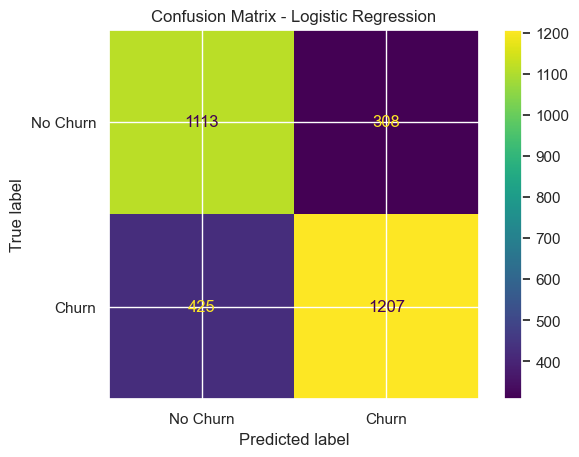

Accuracy Score Train = 0.7712399943828114
Accuracy Score Test = 0.7599082869308876




In [48]:
confusion_matrix_plot(telco_ohe_binary_train_rfe_resample,churn_train_upsample,telco_ohe_binary_test_rfe_resample,churn_test_upsample, Churn_pred_logreg,logreg,"Logistic Regression")

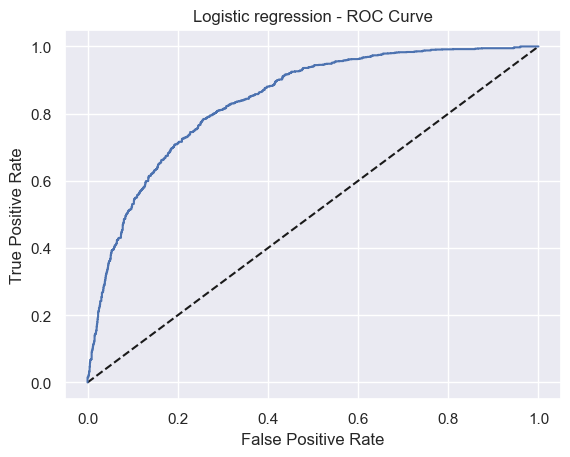

AUC Score (ROC):0.8389629925281215


In [49]:
roc_curve_auc_score(telco_ohe_binary_train_rfe_resample,churn_test_upsample,Churn_pred_logreg_proba, "Logistic regression")

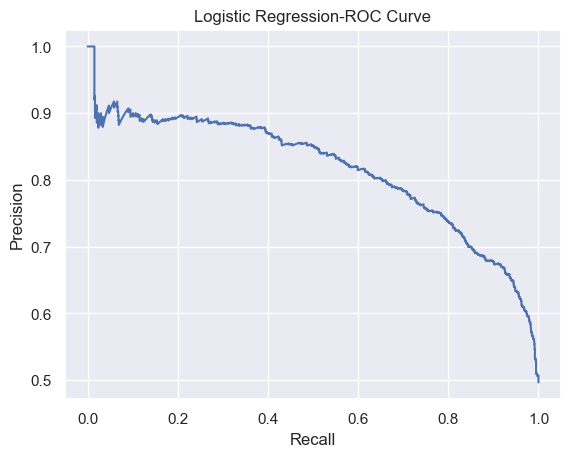

f1 Score : 0.7670797585001589 
 AUC Score (PR) : 0.8154539404947422


In [50]:
precision_recall_curve_and_scores(telco_ohe_binary_test_rfe_resample,churn_test_upsample,Churn_pred_logreg,Churn_pred_logreg_proba,"Logistic Regression")

In [51]:
print(classification_report(churn_test_upsample, Churn_pred_logreg,
                            target_names=["Churn No", "Churn Yes"]))

              precision    recall  f1-score   support

    Churn No       0.78      0.72      0.75      1538
   Churn Yes       0.74      0.80      0.77      1515

    accuracy                           0.76      3053
   macro avg       0.76      0.76      0.76      3053
weighted avg       0.76      0.76      0.76      3053



# Attempt 2: KNN Clustering

In [52]:
np_telco_ohe_binary_train_resample = telco_ohe_binary_train_rfe_resample.values
np_churn_train_resample = churn_train_upsample.values.ravel()
np_telco_ohe_binary_test_resample = telco_ohe_binary_test_rfe_resample.values
np_churn_test_resample = churn_test_upsample.values.ravel()

In [55]:
knn_cls = KNeighborsClassifier()
parameters = {
    "n_neighbors": range(30, 50, 2),
    "metric": ["minkowski"],
    "p": [1.0, 2.0],
    "algorithm": ["brute"]
}

skf_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
gscv = GridSearchCV(
    estimator=knn_cls,
    param_grid=parameters,
    scoring="f1",
    n_jobs=-1,
    cv=skf_cv,
    verbose=False
)

gscv.fit(np_telco_ohe_binary_train_resample, np_churn_train_resample)
churn_pred_knn_upsample = gscv.predict(np_telco_ohe_binary_test_resample)
churn_pred_knn_proba_upsample =gscv.predict_proba(np_telco_ohe_binary_test_resample)
print("Best parameters {}".format(gscv.best_params_))

Best parameters {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 42, 'p': 1.0}


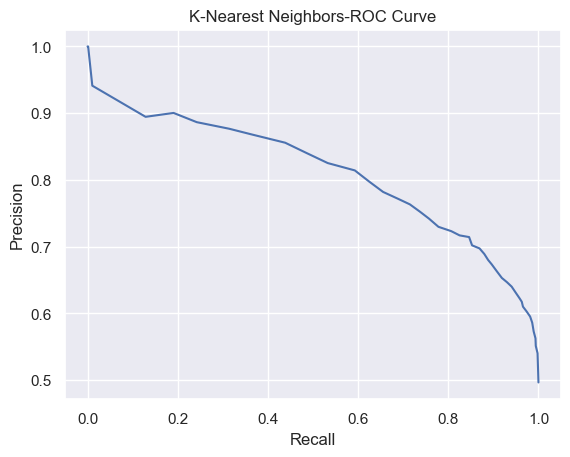

f1 Score : 0.7671064743786439 
 AUC Score (PR) : 0.811605000892337


In [56]:
precision_recall_curve_and_scores(np_telco_ohe_binary_test_resample,np_churn_test_resample,churn_pred_knn_upsample,churn_pred_knn_proba_upsample,"K-Nearest Neighbors")

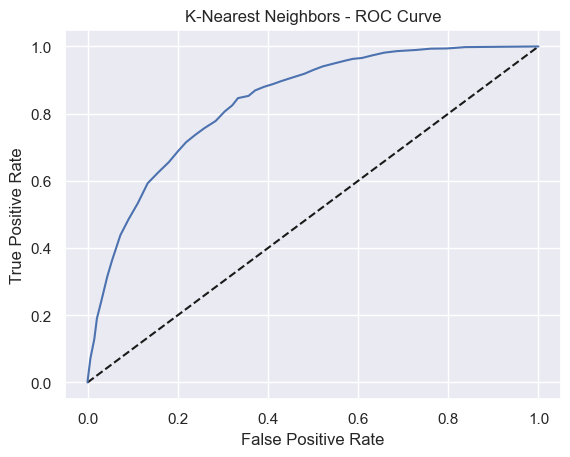

AUC Score (ROC):0.8342380271837327


In [57]:
roc_curve_auc_score(np_telco_ohe_binary_test_resample,np_churn_test_resample,churn_pred_knn_proba_upsample, "K-Nearest Neighbors")

In [ ]:
knn_cls = KNeighborsClassifier(**gscv.best_params_)
knn_cls.fit(np_telco_ohe_binary_train_resample, np_churn_train_resample)
churn_pred = knn_cls.predict(np_telco_ohe_binary_test_resample)
print(classification_report(np_churn_test_resample, churn_pred,
                            target_names=["Churn No", "Churn Yes"]))